<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/MIDTERMS/MODULE%209/HOA_9_2_CASTILLO%2C_RONEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-On-Activity 9.2: Customized Visualizations using Seaborn**

Name: Castillo, Ronel Christian V

Section: CPE22S3

Performed on: 07/07/2024

Submitted on: 07/12/2024

Submitted to: Engr. Roman M. Richard

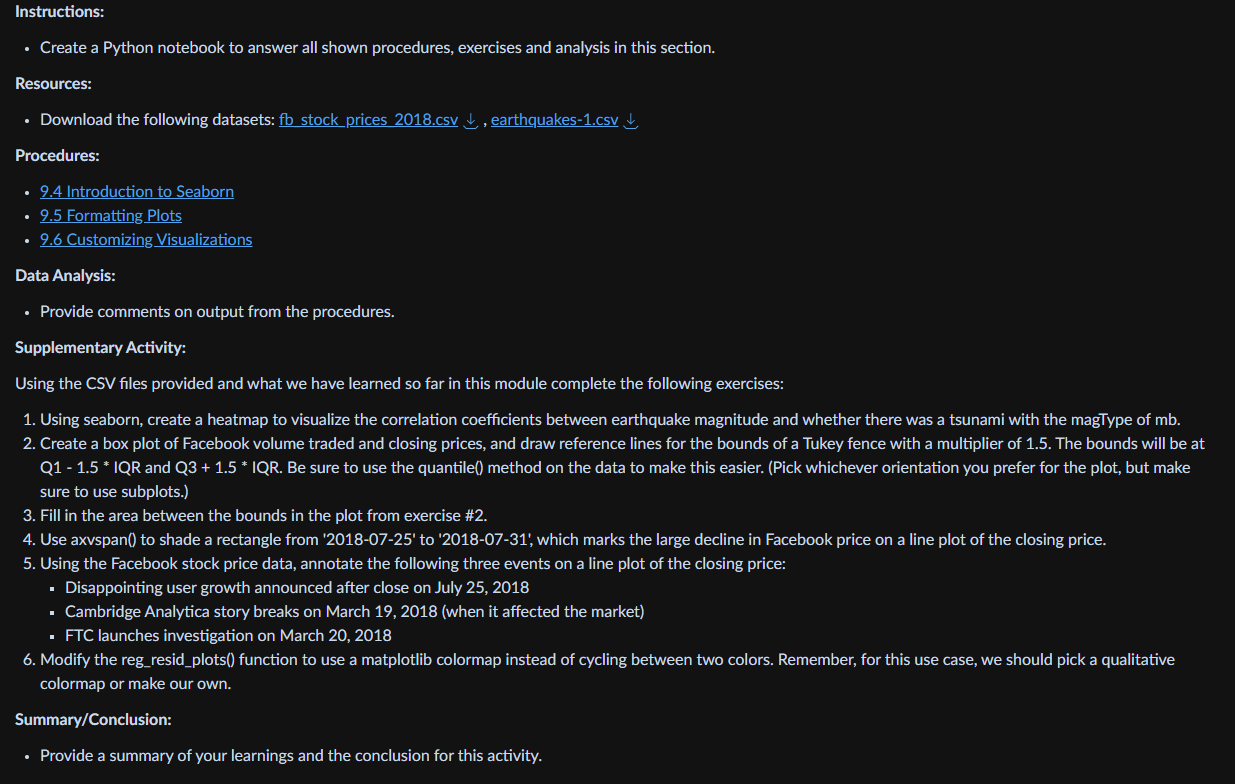

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fb = pd.read_csv('/content/fb_stock_prices_2018.csv' , index_col='date', parse_dates=True)
quakes = pd.read_csv('/content/earthquakes-1.csv')

# setup data visualization

<Axes: >

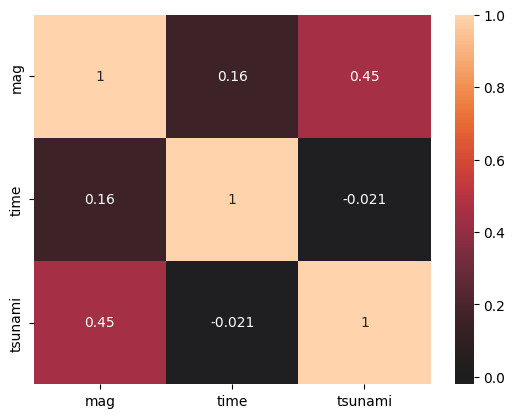

In [4]:
quakesMb = quakes.query('magType == "mb"')
numeric_columns = quakesMb.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True, center=0)
# now we create a heatmap to visualize the data with the correlation of the magnitude and tsunami, magType as mb

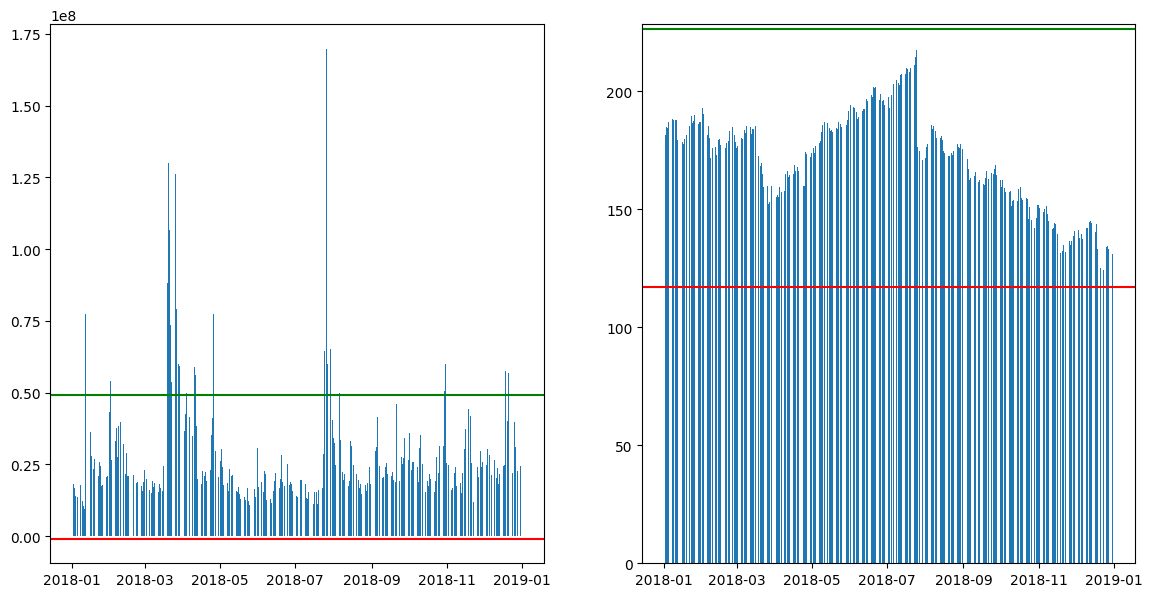

In [5]:
# box plot of Facebook's closing and volume traded

iqrVolume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
iqrClose = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)

tukeyLowerVolume = fb['volume'].quantile(0.25) - 1.5 * iqrVolume
tukeyUpperVolume = fb['volume'].quantile(0.75) + 1.5 * iqrVolume
tukeyLowerClose = fb['close'].quantile(0.25) - 1.5 * iqrClose
tukeyUpperClose = fb['close'].quantile(0.75) + 1.5 * iqrClose

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].bar(fb.index, fb.volume)
ax[0].axhline(tukeyLowerVolume, color='r')
ax[0].axhline(tukeyUpperVolume, color='g')

ax[1].bar(fb.index, fb.close)
ax[1].axhline(tukeyLowerClose, color='r')
ax[1].axhline(tukeyUpperClose, color='g')

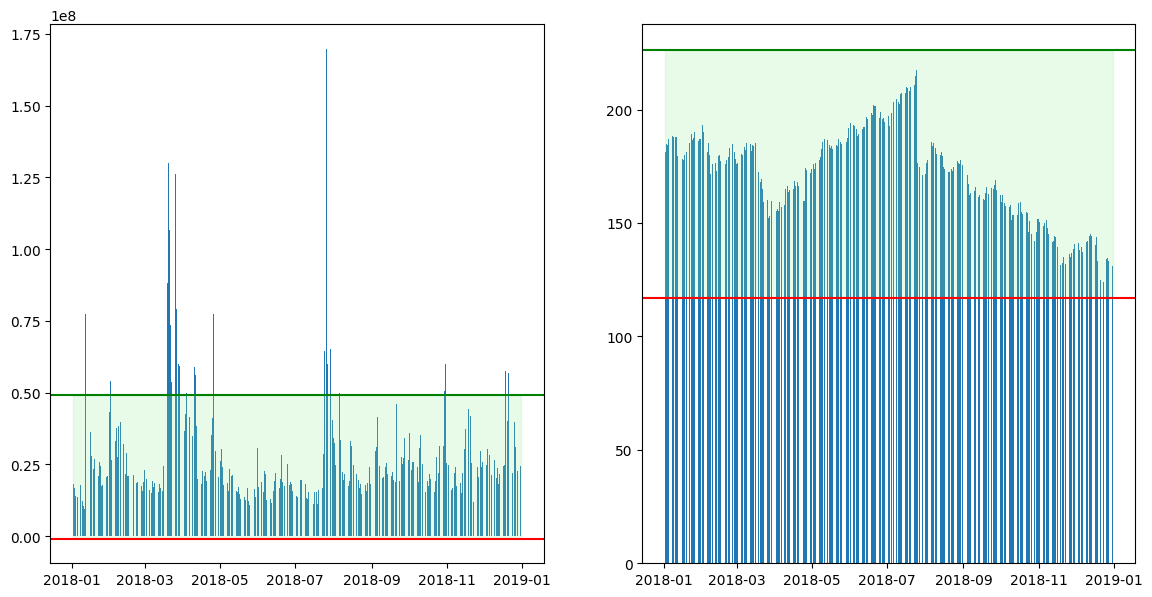

In [6]:
# Filling the area of the bounds of the above graph.
# Creating a box plot of Facebook volume traded and closing prices.
iqrVolume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
iqrClose = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)

tukeyLowerVolume = fb['volume'].quantile(0.25) - 1.5 * iqrVolume
tukeyUpperVolume = fb['volume'].quantile(0.75) + 1.5 * iqrVolume
tukeyLowerClose = fb['close'].quantile(0.25) - 1.5 * iqrClose
tukeyUpperClose = fb['close'].quantile(0.75) + 1.5 * iqrClose

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].bar(fb.index, fb.volume)
ax[0].axhline(tukeyLowerVolume, color='r')
ax[0].axhline(tukeyUpperVolume, color='g')
ax[0].fill_between(fb.index, tukeyLowerVolume, tukeyUpperVolume, color='lightgreen', alpha=0.2)

ax[1].bar(fb.index, fb.close)
ax[1].axhline(tukeyLowerClose, color='r')
ax[1].axhline(tukeyUpperClose, color='g')
ax[1].fill_between(fb.index, tukeyLowerClose, tukeyUpperClose, color='lightgreen', alpha=0.2)

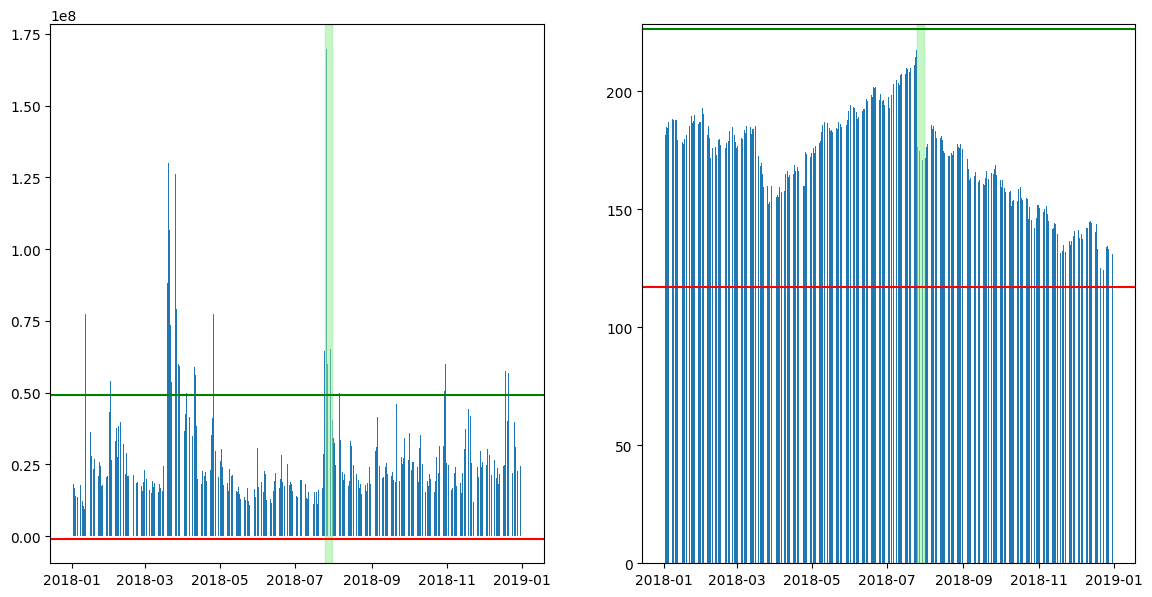

In [7]:
# Using avxspan() to shade a rectangle which marks the decline of Facebook price.
iqrVolume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
iqrClose = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)

tukeyLowerVolume = fb['volume'].quantile(0.25) - 1.5 * iqrVolume
tukeyUpperVolume = fb['volume'].quantile(0.75) + 1.5 * iqrVolume
tukeyLowerClose = fb['close'].quantile(0.25) - 1.5 * iqrClose
tukeyUpperClose = fb['close'].quantile(0.75) + 1.5 * iqrClose

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].bar(fb.index, fb.volume)
ax[0].axhline(tukeyLowerVolume, color='r')
ax[0].axhline(tukeyUpperVolume, color='g')
ax[0].axvspan('2018-07-25', '2018-07-31', color='lightgreen', alpha=0.5)

ax[1].bar(fb.index, fb.close)
ax[1].axhline(tukeyLowerClose, color='r')
ax[1].axhline(tukeyUpperClose, color='g')
ax[1].axvspan('2018-07-25', '2018-07-31', color='lightgreen', alpha=0.5)

Text(17610.0, 168.15, 'FTC launches investigation')

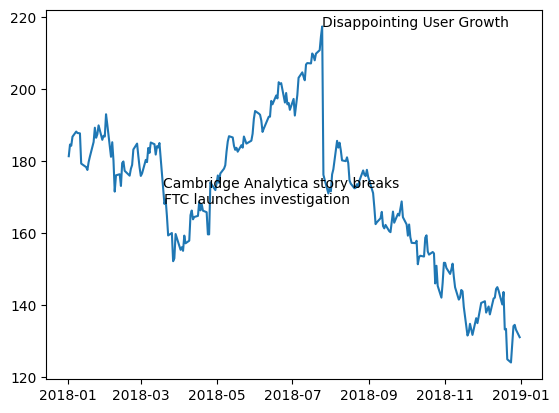

In [8]:
# Using the Facebook Stock Price dataset for annotating significant events.
import matplotlib.dates as plt_date

plt.plot(fb.close)
plt.annotate('Disappointing User Growth', xy=(plt_date.date2num(pd.to_datetime('2018-07-25')), fb.loc['2018-07-25', 'close']))
plt.annotate('Cambridge Analytica story breaks', xy=(plt_date.date2num(pd.to_datetime('2018-03-19')), fb.loc['2018-03-19', 'close']))
plt.annotate('FTC launches investigation', xy=(plt_date.date2num(pd.to_datetime('2018-03-20')), fb.loc['2018-03-20', 'close']))

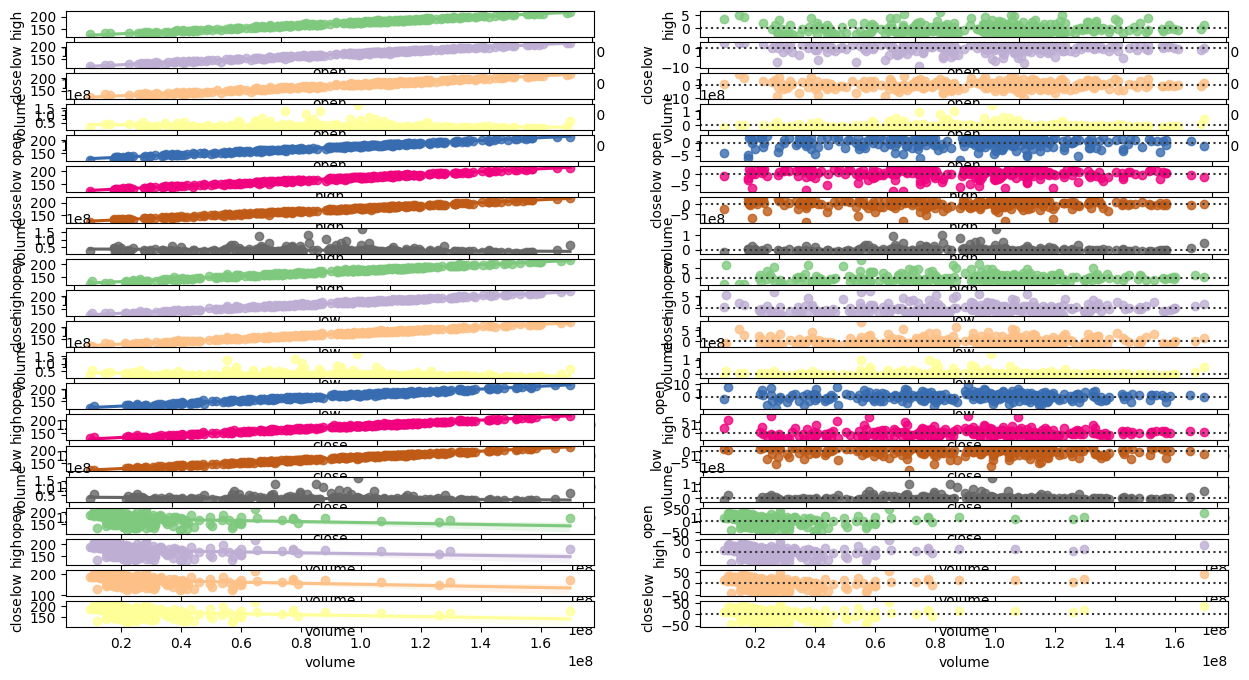

In [9]:
# Modifying the reg_red_plots() function instead of cycling between two colors.
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

def reg_resid_plots(data):
  num_cols = data.shape[1]
  permutation_count = num_cols*(num_cols - 1)
  fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
  colormap = plt.colormaps['Accent']

  for i, (x,y), axes in zip(range(permutation_count), itertools.permutations(data.columns, 2), ax):
    color = colormap(i%colormap.N)
    for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
      func(data=data, x=x, y=y, color=color, ax=subplot)

  plt.close()
  return fig

reg_resid_plots(fb)

# **Summary/Conclusion:**

It is a no-brainer to visualize data when it comes to data science, since this increases the effeciency of gathering and annotating/interpreting data. WE already have pandas, numpy, and matplotlib for data gathering, wrangling, as well as visualization, Seaborn is another option for us to visualize data in a more interactive and 'fun' way with the heatmaps as well as the reg plots.